# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muh Royan Fauzi Maulana
- **Email:** royanfauzimaulana25@gmail.com
- **ID Dicoding:** royanfauzimaulana25

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh hubungan musim dan banyaknya sewa sepeda harian ? 
- Apakah terdapat pola berdasarkan waktu (*Month & Hour*) dalam jumlah sewa sepeda harian ?
- Berapa banyak pengguna yang menyewa sepeda dihari kerja (*Working day*) dan hari libur (*holiday*) ?
- Cuaca manakah yang paling digemari penyewa untuk bersepada ? 

## Import Semua Packages/Library yang Digunakan

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Data *`hour.csv`* memiliki informasi yang lebih detail terkait jam pengguna menyewa sepeda, sehingga dataset yang digunakan hanya *`hour.csv`*. 

In [29]:
data = pd.read_csv("data\hour.csv")
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

#### Memeriksa type data

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tipe data variabel `dteday` bertipe *object* yang seharusnya bertipe *datetime*.

In [31]:
data['dteday'] = pd.to_datetime(data['dteday'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Memeriksa *Missing Value*

In [32]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada dataset tidak terdapat nilai *`null`*

#### Memeriksa Duplikasi Data

In [33]:
duplikasi = data.duplicated().sum()
print(f"Jumlah data duplikasi berjumlah : {duplikasi}")

Jumlah data duplikasi berjumlah : 0


Tidak terdapat data duplikasi / *duplicated*

#### Memeriksa *`Inaccurate Value`*

In [34]:
data[['temp', 'atemp', 'hum', 'windspeed']].describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098
std,0.192556,0.171850,0.192930,0.122340
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


#### Memeriksa *`Outlier`*

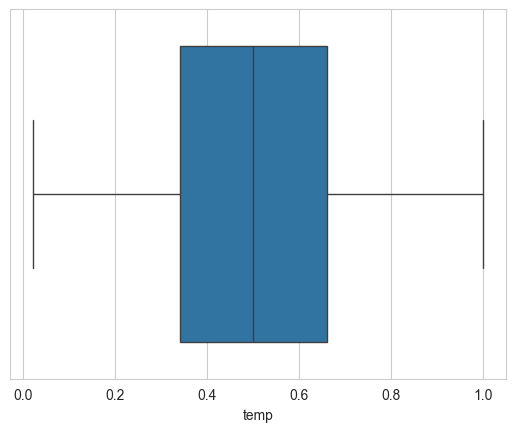

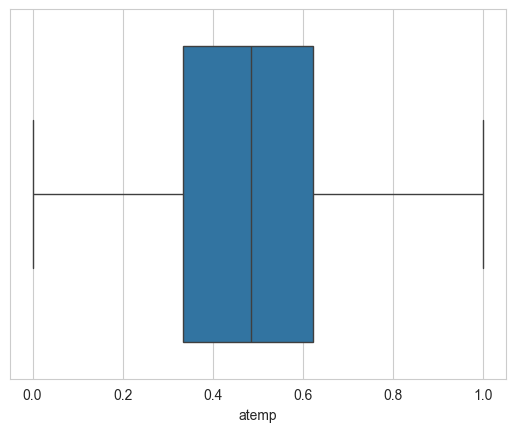

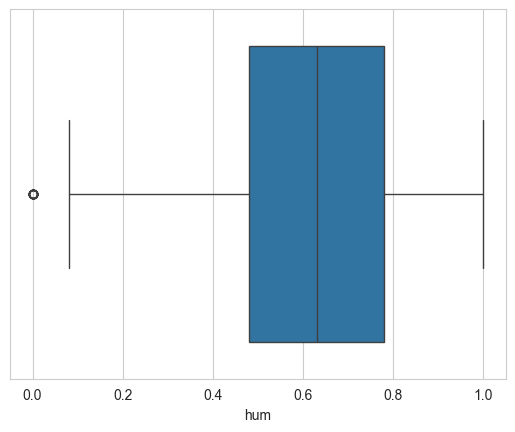

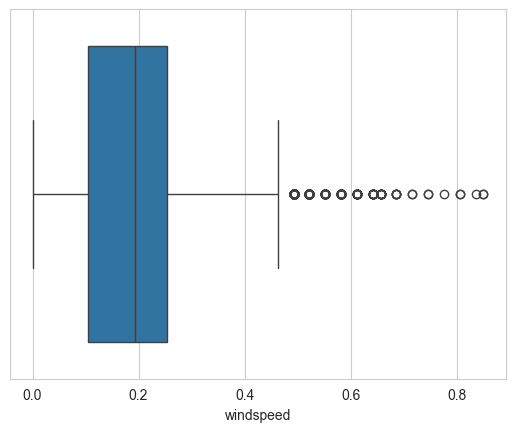

In [35]:
numerical_feature = ['temp', 'atemp', 'hum', 'windspeed']
for col_name in numerical_feature:
    sns.boxplot(x=data[col_name])
    plt.show()

Diketahui terdapat nilai outlier pada fitur `hum` dan `windspeed`. 

### Cleaning Data

#### Mengatasi nilai *Outlier* pada fitur *`hum & windspeed`* dengan mengeluarkan nilai tersebut

In [36]:
# fitur hum
Q1 = (data['hum']).quantile(0.25)
Q3 = (data['hum']).quantile(0.75)
IQR = Q3 - Q1

minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = data['hum'] < minimum
data['hum'] = data['hum'].astype(float)
data.drop(data[kondisi_lower_than].index, inplace=True)

In [37]:
# fitur windspeed
Q1 = (data['windspeed']).quantile(0.25)
Q3 = (data['windspeed']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)

kondisi_more_than = data['windspeed'] > maximum

data.drop(data[kondisi_more_than].index, inplace=True)

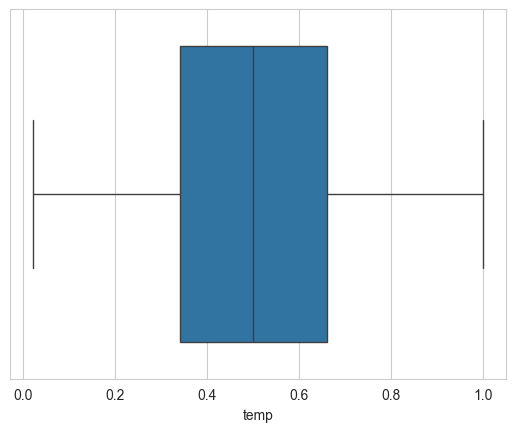

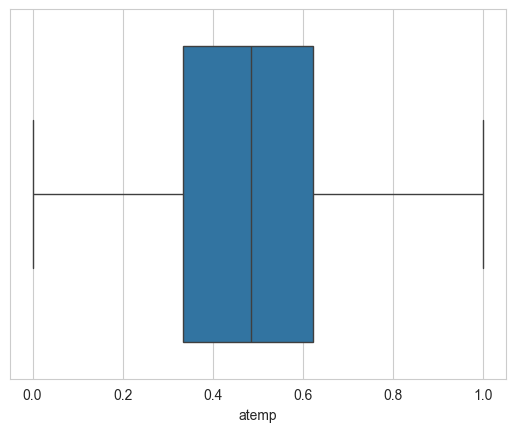

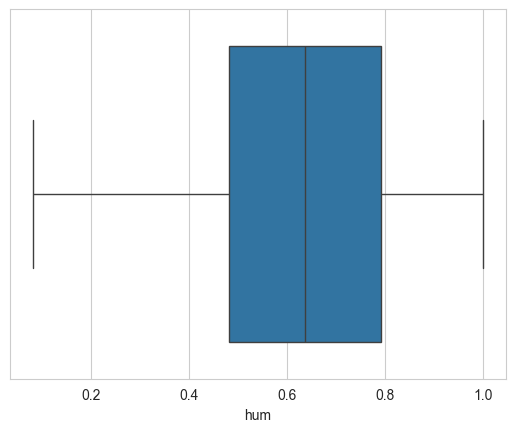

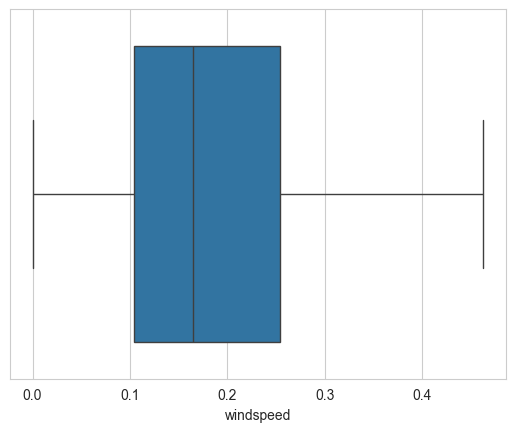

In [38]:
numerical_feature = ['temp', 'atemp', 'hum', 'windspeed']
for col_name in numerical_feature:
    sns.boxplot(x=data[col_name])
    plt.show()

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17016 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17016 non-null  int64         
 1   dteday      17016 non-null  datetime64[ns]
 2   season      17016 non-null  int64         
 3   yr          17016 non-null  int64         
 4   mnth        17016 non-null  int64         
 5   hr          17016 non-null  int64         
 6   holiday     17016 non-null  int64         
 7   weekday     17016 non-null  int64         
 8   workingday  17016 non-null  int64         
 9   weathersit  17016 non-null  int64         
 10  temp        17016 non-null  float64       
 11  atemp       17016 non-null  float64       
 12  hum         17016 non-null  float64       
 13  windspeed   17016 non-null  float64       
 14  casual      17016 non-null  int64         
 15  registered  17016 non-null  int64         
 16  cnt         17016 non-

In [40]:
data.to_csv("dashboard/data.csv")

## Exploratory Data Analysis (EDA)

### Explore dataset

In [41]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000
mean,8719.636460,2.516396,0.502997,6.572873,11.503996,0.028914,2.998002,0.682769,1.422308,0.498235,0.477199,0.630960,0.182814,35.784262,154.048895,189.833157
std,5009.380243,1.103448,0.500006,3.427822,6.933561,0.167570,2.005194,0.465412,0.635204,0.192770,0.171556,0.190498,0.112016,49.419374,151.680591,181.762553
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4393.750000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8697.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.635000,0.164200,17.000000,116.000000,142.000000
75%,13075.250000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.253700,48.250000,221.000000,282.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.462700,367.000000,886.000000,977.000000


In [42]:
data.groupby(by=['season']).agg({
    "casual" : ["max", "min", "sum"],
    "registered" : ["max", "min", "sum"],
    "cnt" : ["max", "min", "sum"],
})

casual             registered              cnt             
          max min     sum        max min     sum  max min      sum
season                                                            
1         367   0   57722        681   0  390083  801   1   447805
2         361   0  199638        778   0  699798  957   1   899436
3         350   0  223909        886   0  827289  977   1  1051198
4         362   0  127636        876   0  704126  967   1   831762

In [43]:
data.groupby(by=['mnth']).agg({
    "casual" : ["max", "min", "sum"],
    "registered" : ["max", "min", "sum"],
    "cnt" : ["max", "min", "sum"],
})

casual            registered              cnt            
        max min    sum        max min     sum  max min     sum
mnth                                                          
1       156   0  11662        518   0  118425  559   1  130087
2       229   0  13944        567   0  129257  610   1  143201
3       367   0  43010        693   0  175854  957   1  218864
4       355   0  58692        697   0  201461  822   1  260153
5       361   0  74621        770   1  253264  873   1  327885
6       297   0  73116        796   0  268106  900   1  341222
7       269   0  77442        790   1  264333  913   1  341775
8       289   0  71348        811   0  277144  941   1  348492
9       350   0  69690        886   0  273225  977   1  342915
10      362   0  58163        876   1  257349  963   1  315512
11      304   0  36141        709   0  216365  729   1  252506
12      167   0  21076        737   0  186513  759   1  207589

In [44]:
data.groupby(by=['hr']).agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum",
}).sort_values(by='cnt')

,casual,registered,cnt
hr,,,
4,869,3538,4407
3,1881,6238,8119
5,1008,13146,14154
2,3399,12848,16247
1,4704,19397,24101
0,7352,31632,38984
6,3002,51720,54722
23,11049,52638,63687
22,16071,78382,94453


In [45]:
data.groupby(by=['workingday']).agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum",
}).sort_values(by='cnt')

,casual,registered,cnt
workingday,,,
0,311523,670505,982028
1,297382,1950791,2248173


In [46]:
data.groupby(by=['holiday']).agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum",
}).sort_values(by='cnt')

,casual,registered,cnt
holiday,,,
1,22055,55131,77186
0,586850,2566165,3153015


In [47]:
data.groupby(by=['weathersit']).agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum",
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
weathersit,,,
1,454752,1840597,2295349
2,132383,650463,782846
3,21762,130021,151783
4,8,215,223


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh hubungan musim dan banyaknya sewa sepeda harian ? 

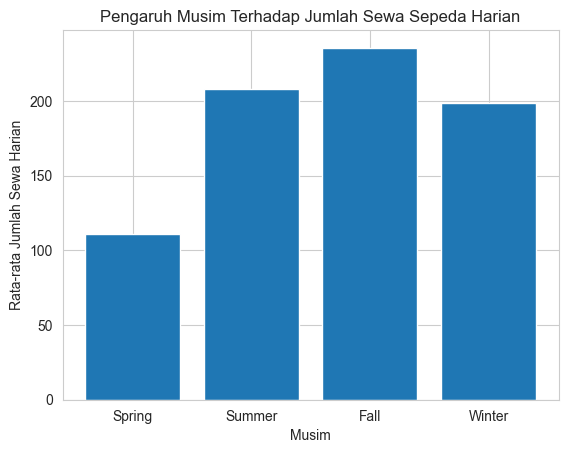

In [48]:
seasonal_data = data.groupby('season')['cnt'].mean()
season_names = ['Spring', 'Summer', 'Fall', 'Winter']
plt.bar(season_names, seasonal_data)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Pengaruh Musim Terhadap Jumlah Sewa Sepeda Harian')
plt.show()

In [49]:
data.groupby('season')['cnt'].mean().max()

235.69461883408073

Berdasarkan grafik diatas, musim *fall* memiliki jumlah penyewa paling banyak sebesar 235 penyewa /hari

### Pertanyaan 2: Apakah terdapat pola berdasarkan waktu (*Month & Hour*) dalam jumlah sewa sepeda harian ?

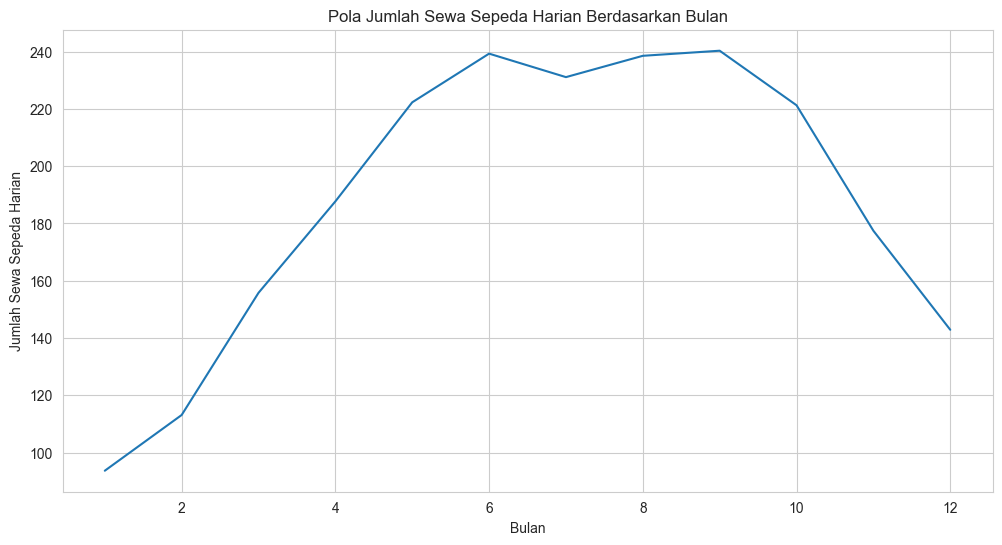

In [50]:
# Pola berdasarkan bulan
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="mnth", y="cnt", data=data, errorbar=None)
plt.title("Pola Jumlah Sewa Sepeda Harian Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

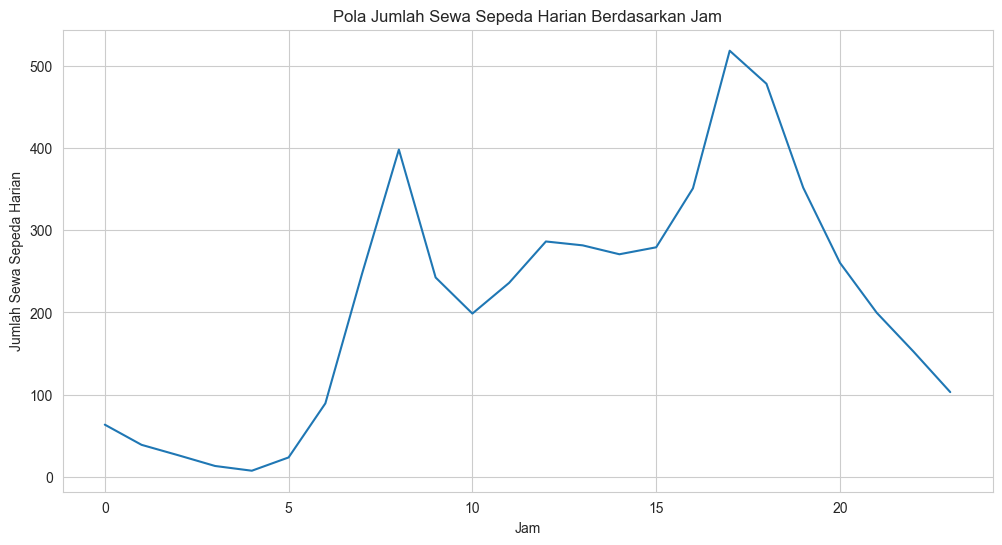

In [51]:
# Pola berdasarkan jam
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt", data=data.where(data['mnth'] > 5), errorbar=None)
plt.title("Pola Jumlah Sewa Sepeda Harian Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

Berdasarkan dua grafik diatas, Pengguna lebih banyak menyewa pada rentang bulan 6 (juni) - 9 (september) Pukul 8 Pagi dan disekitar pukul 5 - 6 sore.

### Pertanyaan 3: Berapa banyak pengguna yang menyewa sepeda dihari kerja (*Working day*) dan hari libur (*holiday*) ?

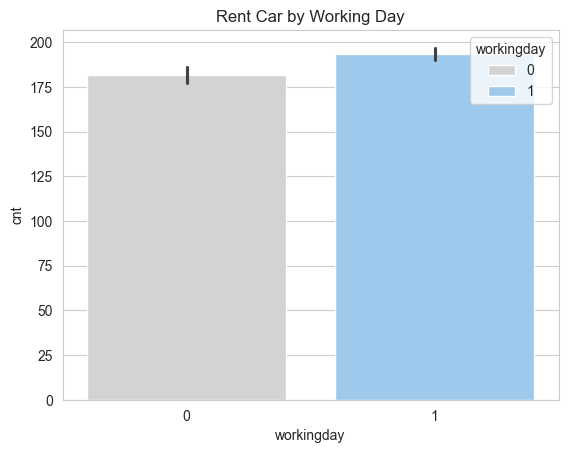

In [57]:
sns.barplot(x="workingday", y="cnt", data=data, hue='workingday', palette=["#D3D3D3", "#90CAF9"])

# Atur judul
plt.title("Rent Car by Working Day")

# Tampilkan plot
plt.show()

Berdasarkan grafik diatas didapatkan bahwa pengguna kebanyakan menyewa sepeda di hari kerja ketimbang dihari libur. 

### Pertanyaan 4: Cuaca manakah yang paling digemari penyewa untuk bersepada ? ?

C:\Users\Royan\AppData\Local\Temp\ipykernel_21144\4235807092.py:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="weathersit", y="cnt", data=data, hue='weathersit', palette=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"])


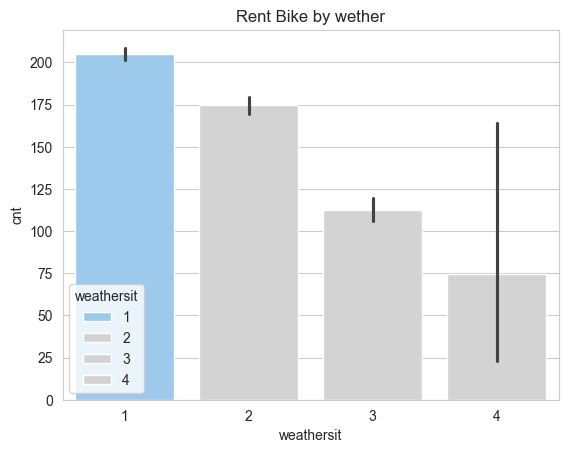

In [59]:
sns.barplot(x="weathersit", y="cnt", data=data, hue='weathersit', palette=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"])

# Atur judul
plt.title("Rent Bike by wether")

# Tampilkan plot
plt.show()

Berdasarkan grafik diatas, pengguna kebanyakn menyewa sepeda dihari yang cerah. 

## Conclusion

Berdasarkan hasil analisis dan visualisasi diatas didapatkan hasil penjelasan atau *explanatory* sebagai berikut : 
- Pengguna lebih banyak menyewa sepeda di musim gugur (*Fall*), meskipun begitu jumlah penyewa dibulan *summer* dan *winter* tidak terlalu jauh dari musim gugur. 
- Sesuai dengan musim yang digemari, bulan 6 - 9 (juni - september) merupakan bulan yang paling digemari penyewa sepeda karena dibulan tersebut jumlah sewa sepeda paling banyak.
- Adapun hari kerja merupakan waktu paling banyak pengguna menyewa sepeda, namun jumlah nya tak terlalu jauh dari hari libur
- Cuaca cerah / *clear* menjadi cuaca yang paling diminati pengguna untuk menyewa sepeda. 